<a href="https://colab.research.google.com/github/bailejor/SAMSHA_Transfer_Learning/blob/main/Methadone_no_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Methadone Set, No Transfer Learning**

In this notebook a base CNN is created and trained on 70% of the methadone dataset. 15% is used for a validation set and 15% used to test. 

66% Balanced Accuracy

66% ROC_AUC

65% Accuracy


In [1]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, GlobalAveragePooling2D, Conv2D, Activation, Flatten, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.applications import ResNet50
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing import image_dataset_from_directory
from keras.models import Model
from keras.optimizers import Adam
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, confusion_matrix, accuracy_score
np.set_printoptions(threshold=np.inf)

In [ ]:
!unzip /content/drive/MyDrive/MethImages70.nosync.zip

In [ ]:
!unzip /content/drive/MyDrive/MethImages15Val.nosync.zip

In [ ]:
!unzip /content/drive/MyDrive/MethImages15Test.nosync.zip

Found 117110 files belonging to 2 classes.
Found 25095 files belonging to 2 classes.


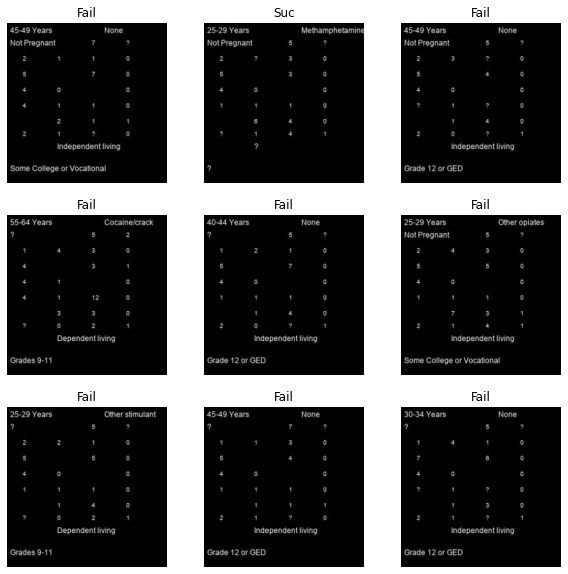

In [5]:
train_dataset_meth = image_dataset_from_directory('/content/MethImages70.nosync', image_size=(250, 250), color_mode='rgb', batch_size = 32, shuffle=True)


validation_dataset_meth = image_dataset_from_directory('/content/MethImages15Val.nosync', image_size=(250, 250), color_mode='rgb', batch_size = 32,  shuffle=True)

class_names = train_dataset_meth.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_dataset_meth.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+ 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [7]:


model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(250, 250, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))


model.summary()


model.compile(loss = keras.losses.BinaryCrossentropy(from_logits=True), optimizer = keras.optimizers.Adam(),
              metrics=[keras.metrics.AUC(), keras.metrics.BinaryAccuracy(), keras.metrics.TruePositives(), keras.metrics.TrueNegatives(), keras.metrics.FalseNegatives(), keras.metrics.FalsePositives()])

class_weight = {0:50, 1:50}


history = model.fit(train_dataset_meth, epochs = 10, verbose = 1, validation_data = validation_dataset_meth, class_weight=class_weight)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 248, 248, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 248, 248, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 122, 122, 32)      9248      
_________________________________________________________________
activation_7 (Activation)    (None, 122, 122, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 61, 61, 32)       

In [9]:
test_dataset = image_dataset_from_directory('/content/MethImages15Test.nosync', image_size=(250, 250), color_mode='rgb', shuffle=False, labels = 'inferred', label_mode = 'binary')

Found 25096 files belonging to 2 classes.


In [10]:

test_labels = []
test_classes = test_dataset.class_names
for images, labels in test_dataset:
  test_labels.append(labels)
test_labels = np.concatenate(test_labels, axis=0 )
test_labels = test_labels.flatten()


pred = model.predict_classes(test_dataset)
jor = pred.flatten()


print(balanced_accuracy_score(test_labels, jor))
print(roc_auc_score(test_labels, jor))
print(accuracy_score(test_labels, jor))
print(confusion_matrix(test_labels, jor))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.535288157003039
0.535288157003039
0.8098900223143131
[[19947    80]
 [ 4691   378]]
